In [1]:
import pandas as pd
import numpy as np

# Loading of given dataset
df = pd.read_csv("Retail_Sales_500.csv")

# Displaying first few rows
print(df.head())

# Checking the missing values
print("Missing values:\n", df.isnull().sum())

# Droping of duplicates if any
df = df.drop_duplicates()

# Summary statistics
summary = df[['Quantity', 'Total_Amount']].agg(['min', 'max', 'mean'])
print("\nSummary Statistics:\n", summary)

# Observation: General info
print("\nData Types:\n", df.dtypes)
print("\nShape of dataset:", df.shape)

# Replace missing numeric values (if any) with mean
df['Quantity'].fillna(df['Quantity'].mean(), inplace=True)
df['Total_Amount'].fillna(df['Total_Amount'].mean(), inplace=True)

# Save cleaned data
df.to_csv("Cleaned_Retail_Sales.csv", index=False)
print("\nData cleaned and saved as 'Cleaned_Retail_Sales.csv'")

  Transaction_ID        Date Customer_ID Product     Category  Quantity  \
0          T1000  2024-01-01         C82  Laptop  Electronics         4   
1          T1001  2024-01-02         C15   Shoes      Fashion         5   
2          T1002  2024-01-03          C4  Laptop  Electronics         3   
3          T1003  2024-01-04         C95  Laptop  Electronics         5   
4          T1004  2024-01-05         C36  Mobile  Electronics         5   

   Price Region  Total_Amount  
0  50000   West        200000  
1   1500  North          7500  
2  50000   East        150000  
3  50000   West        250000  
4  15000   West         75000  
Missing values:
 Transaction_ID    0
Date              0
Customer_ID       0
Product           0
Category          0
Quantity          0
Price             0
Region            0
Total_Amount      0
dtype: int64

Summary Statistics:
       Quantity  Total_Amount
min       1.00         20.00
max       5.00     250000.00
mean      2.97      22838.86

Data Typ

/tmp/ipykernel_5829/1299865211.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(df['Quantity'].mean(), inplace=True)
/tmp/ipykernel_5829/1299865211.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [2]:
# ROLL-UP: Total sales aggregated by Region
rollup_region = df.groupby('Region')['Total_Amount'].sum().reset_index()
print("\nTotal Sales by Region:\n", rollup_region)

# SLICE/DICE: Electronics products in North region
slice_data = df[(df['Category'] == 'Electronics') & (df['Region'] == 'North')]
print("\nSales for Electronics in North region:\n", slice_data[['Product', 'Quantity', 'Total_Amount']])

# DRILL-DOWN: Region → Product
drilldown = df.groupby(['Region', 'Product'])['Total_Amount'].sum().reset_index()
print("\nDrill-down (Region → Product):\n", drilldown)


Total Sales by Region:
   Region  Total_Amount
0   East       2819650
1  North       2295800
2  South       2660510
3   West       3643470

Sales for Electronics in North region:
     Product  Quantity  Total_Amount
8    Mobile         3         45000
11   Laptop         3        150000
13   Mobile         2         30000
36   Laptop         3        150000
100  Mobile         4         60000
149  Mobile         4         60000
153  Mobile         1         15000
174  Laptop         4        200000
185  Mobile         4         60000
191  Mobile         5         75000
216  Laptop         4        200000
224  Mobile         1         15000
276  Mobile         5         75000
292  Mobile         1         15000
304  Laptop         3        150000
338  Mobile         5         75000
342  Laptop         3        150000
354  Mobile         2         30000
384  Laptop         5        250000
396  Mobile         5         75000
402  Mobile         1         15000
475  Laptop         5      

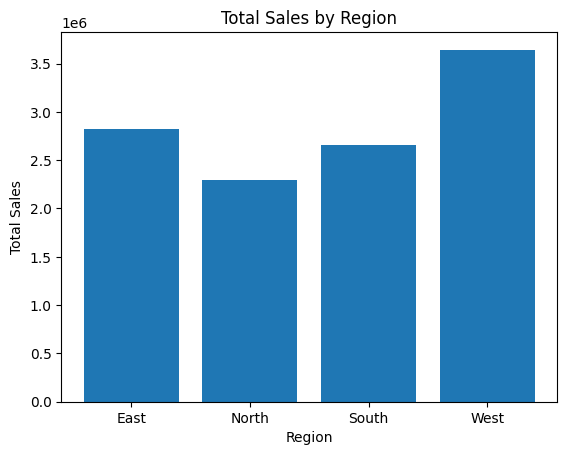

In [3]:
import matplotlib.pyplot as plt

# Roll-up bar chart
plt.bar(rollup_region['Region'], rollup_region['Total_Amount'])
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical columns
le = LabelEncoder()
df['Product'] = le.fit_transform(df['Product'])
df['Region'] = le.fit_transform(df['Region'])
df['Category'] = le.fit_transform(df['Category'])

X = df[['Product', 'Region', 'Quantity']]
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        75
           3       1.00      1.00      1.00        26

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [5]:
from sklearn.cluster import KMeans

X = df[['Quantity', 'Total_Amount']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

print("\nCluster Centers:\n", kmeans.cluster_centers_)
print("\nCluster Summary:\n", df.groupby('Cluster')[['Quantity', 'Total_Amount']].mean())


Cluster Centers:
 [[2.84261501e+00 3.13421308e+03]
 [4.36363636e+00 2.18181818e+05]
 [3.30769231e+00 8.19230769e+04]]

Cluster Summary:
          Quantity   Total_Amount
Cluster                         
0        2.842615    3134.213075
1        4.363636  218181.818182
2        3.307692   81923.076923


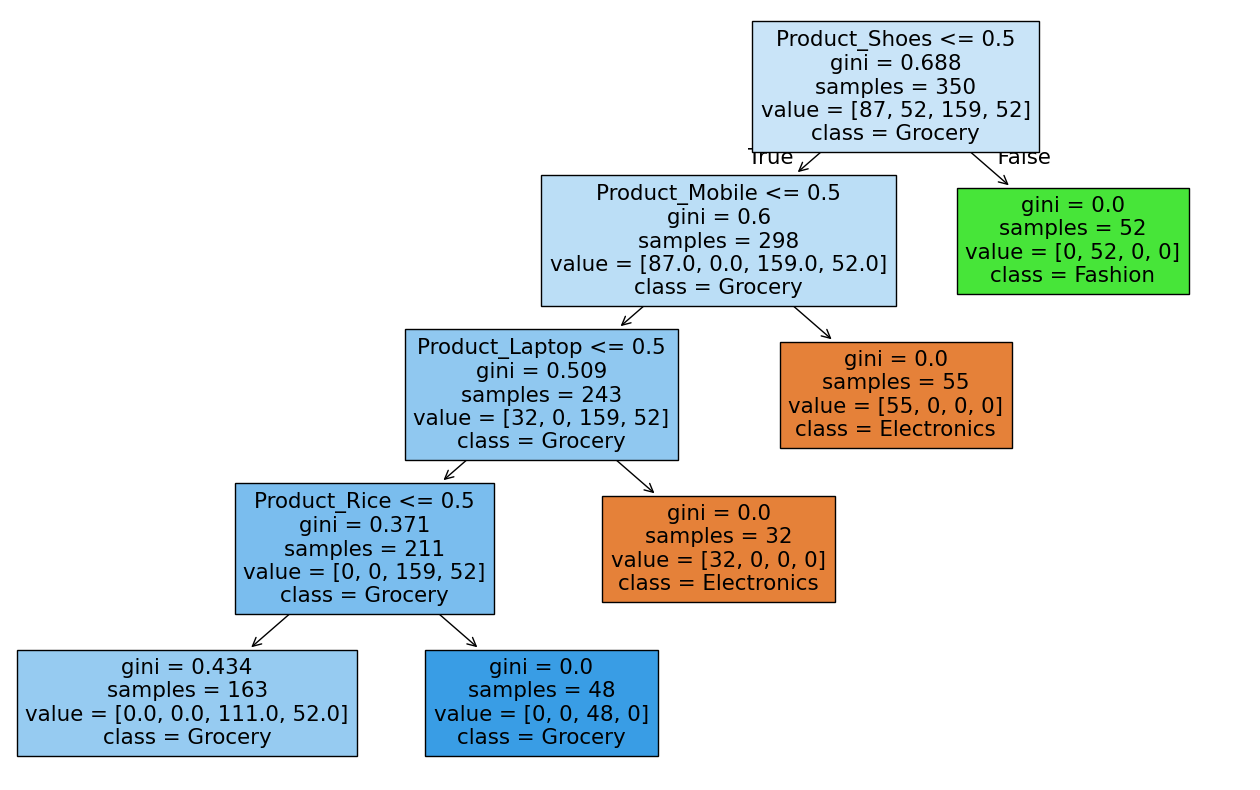

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Retail_Sales_500.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Make Category a string
df['Category'] = df['Category'].astype(str)

# One-hot encode input features
X = pd.get_dummies(df[['Product', 'Region', 'Quantity']], drop_first=True)
y = df['Category']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Plot tree
plt.figure(figsize=(16, 10))
plot_tree(model,
          filled=True,
                    feature_names=X.columns,
                              class_names=model.classes_.astype(str))
plt.show()


Cluster Centers:
 [[2.84261501e+00 3.13421308e+03]
 [4.36363636e+00 2.18181818e+05]
 [3.30769231e+00 8.19230769e+04]]


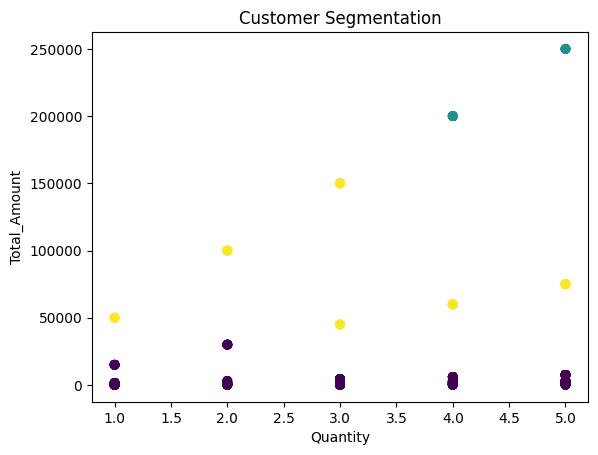

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['Quantity', 'Total_Amount']]

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

print("\nCluster Centers:\n", kmeans.cluster_centers_)

plt.scatter(df['Quantity'], df['Total_Amount'], c=df['Cluster'])
plt.xlabel('Quantity')
plt.ylabel('Total_Amount')
plt.title('Customer Segmentation')
plt.show()

In [8]:
from mlxtend.frequent_patterns import apriori, association_rules

# Create basket per customer
basket = (df.groupby(['Customer_ID', 'Product'])['Quantity']
            .sum()
            .unstack()
            .fillna(0))

# Convert to 0/1
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Frequent itemsets
freq_items = apriori(basket, min_support=0.01, use_colnames=True)
print(freq_items)

# Rules
rules = association_rules(freq_items, metric="lift", min_threshold=1.0)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
print(rules)

     support                                           itemsets
0       0.57                                             (Book)
1       0.42                                           (Laptop)
2       0.39                                             (Milk)
3       0.51                                           (Mobile)
4       0.49                                             (Rice)
..       ...                                                ...
227     0.01         (Laptop, Rice, Milk, Shoes, Shampoo, Soap)
228     0.01       (Laptop, Rice, Mobile, Shoes, Shampoo, Soap)
229     0.01         (Rice, Milk, Mobile, Shoes, Shampoo, Soap)
230     0.02  (Laptop, Rice, Milk, Mobile, Book, Shampoo, Soap)
231     0.01  (Laptop, Rice, Milk, Mobile, Shampoo, Shoes, S...

[232 rows x 2 columns]
     antecedents                                   consequents  support  \
0         (Book)                                     (Shampoo)     0.23   
1      (Shampoo)                                        (B

/tmp/ipykernel_5829/2827325450.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/python/3.12.1/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [9]:
# Frequent itemsets
freq_items = apriori(basket, min_support=0.005, use_colnames=True)
rules = association_rules(freq_items, metric="confidence", min_threshold=0.2)
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Association Rules:
                          antecedents                    consequents  support  \
0                           (Laptop)                         (Book)     0.23   
1                             (Book)                       (Laptop)     0.23   
2                             (Book)                         (Milk)     0.21   
3                             (Milk)                         (Book)     0.21   
4                           (Mobile)                         (Book)     0.29   
...                              ...                            ...      ...   
1935  (Mobile, Rice, Shoes, Shampoo)           (Laptop, Soap, Milk)     0.01   
1936    (Rice, Shoes, Shampoo, Soap)         (Mobile, Laptop, Milk)     0.01   
1937  (Mobile, Shoes, Shampoo, Milk)           (Laptop, Rice, Soap)     0.01   
1938           (Laptop, Rice, Shoes)  (Mobile, Shampoo, Soap, Milk)     0.01   
1939           (Laptop, Shoes, Milk)  (Mobile, Rice, Shampoo, Soap)     0.01   

      confidence  

/usr/local/python/3.12.1/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
